In [1]:
# !pip3 install catboost

In [2]:
# Import Dependiences
%matplotlib inline

# Start Python Import
import math
import time
import random
import datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import train & test data
train = pd.read_csv('https://raw.githubusercontent.com/MarekLas/kaggle_titanic/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/MarekLas/kaggle_titanic/main/test.csv')
gender_submission = pd.read_csv('https://raw.githubusercontent.com/MarekLas/kaggle_titanic/main/gender_submission.csv')

In [4]:
# View the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# View the test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# view the example submission datarame
gender_submission.head()

,<<<<<<< HEAD
PassengerId,Survived
892,0
893,1
894,0
895,0


In [7]:
len(train)

891

In [8]:
len(test)

418

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


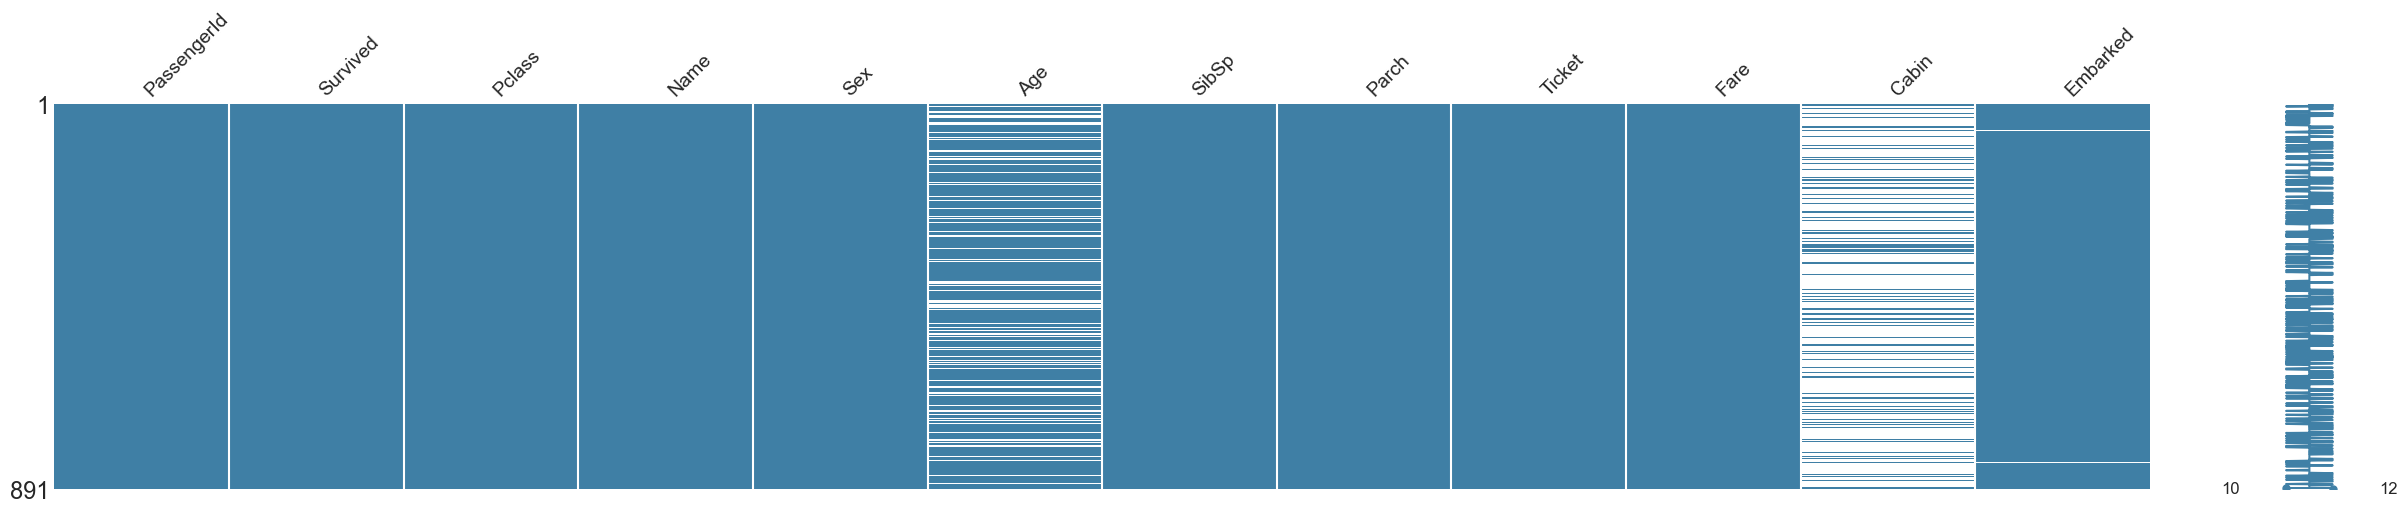

In [10]:
# Plot graphic of missing values
missingno.matrix(train,figsize = (30,5), color=(0.25,0.5,0.65), fontsize=14);

In [11]:
train[train.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
def missing_values (target_column):
    print(train[target_column].isnull().sum())

In [14]:
df_bin = pd.DataFrame() # for discretised variables
df_con = pd.DataFrame() # for continous variables

In [15]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Target Feature: Survived
Description: Whether the passenger survived or not
Key: 0 = did not survive, 1 = survived
This is the variable we want our machine learning model to predict based off all others.

0    549
1    342
Name: Survived, dtype: int64


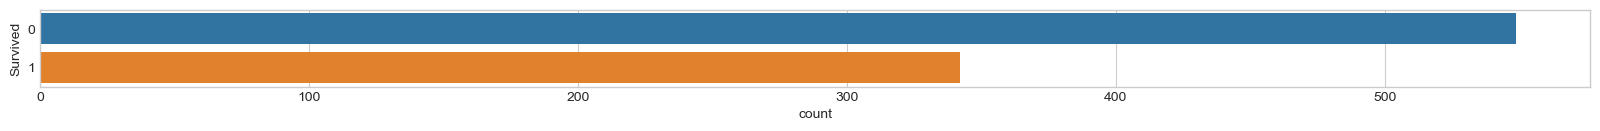

In [16]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [17]:
# Let's add this to our subset dataframe
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [18]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [19]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Feature: Pclass
Description: The ticket class of the passanger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

### Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread is across the dataset.

For example, if there are values which are completly outside of the distribution, we may not include them in our model.

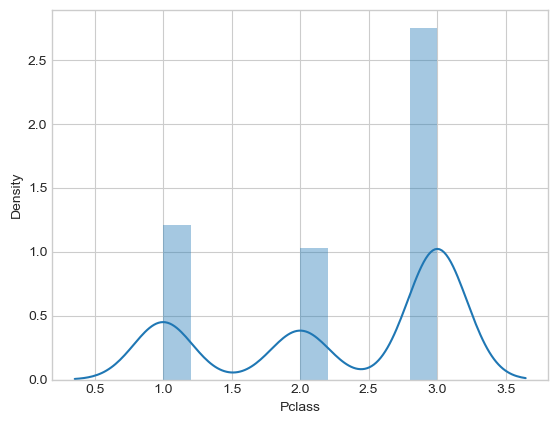

In [20]:
sns.distplot(train.Pclass);

In [21]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [22]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


## Feature: Name
Description: The name of the passenger

In [23]:
# How many different names are there?
train.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

## Feature: Sex
Description: The sex of the passenger (male or female)

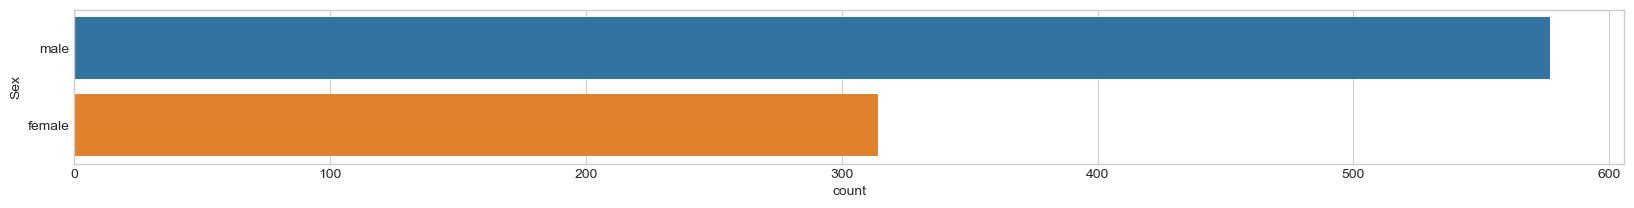

In [24]:
plt.figure(figsize=(20,2))
sns.countplot(y='Sex', data=train);

In [25]:
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)

df_con['Sex'] = train['Sex']

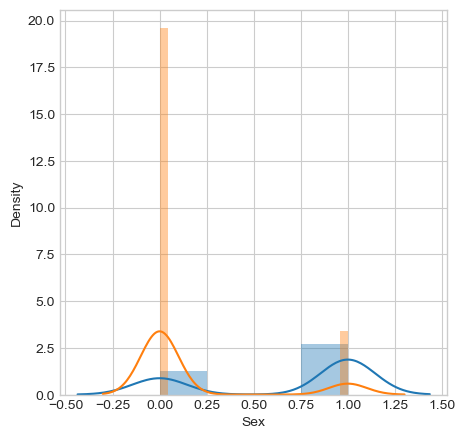

In [26]:
# How does the Sex variable look compared to Survival?
# We can see this because they'e both binary
fig = plt.figure(figsize=(5,5))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

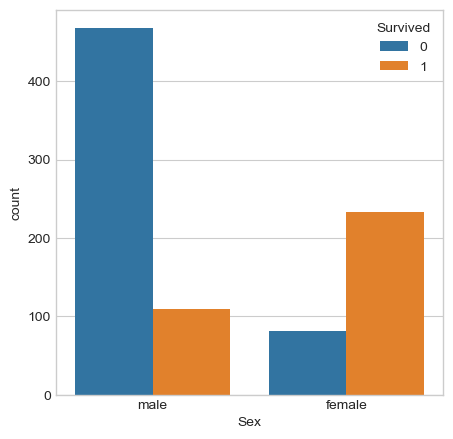

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(x='Sex', data=train, hue='Survived');

## Feature: Age
177 mising values.

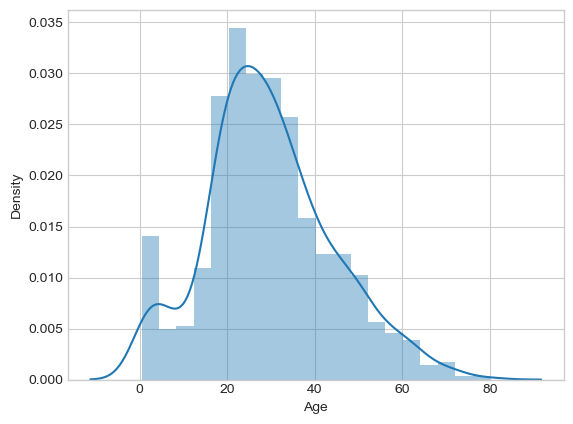

In [28]:
sns.distplot(train['Age']);

In [29]:
train['Age'].mean()

29.69911764705882

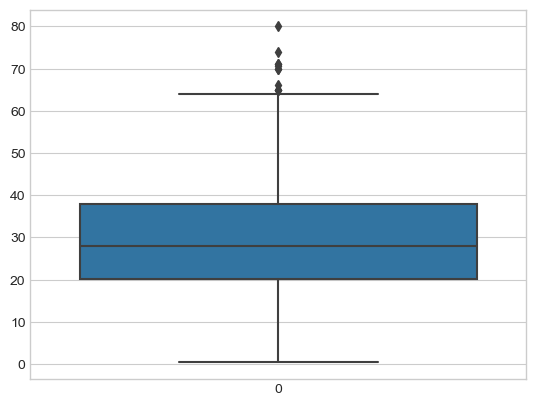

In [30]:
sns.boxplot(train['Age']);

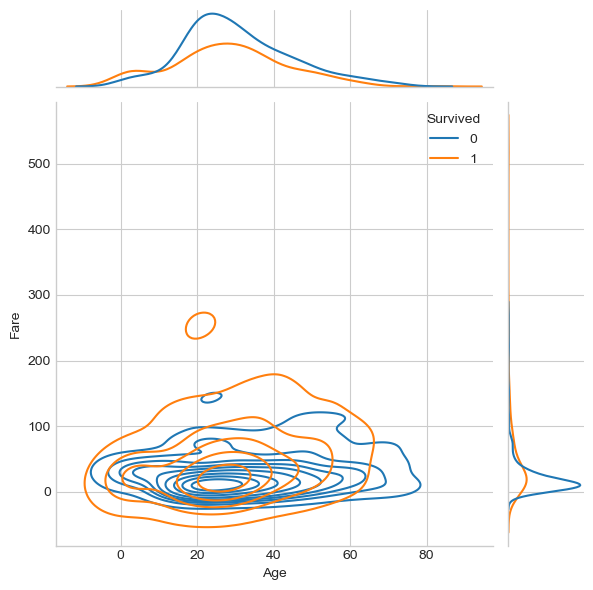

In [31]:
sns.jointplot(x='Age' , y='Fare' , data=train , size=5, hue='Survived', kind='kde');

In [32]:
# train[train.isnull().any(axis=1)]
# gfg['G2'].fillna(value=mean_value, inplace=True)

train_age_isnull=train[train["Age"].isnull()]

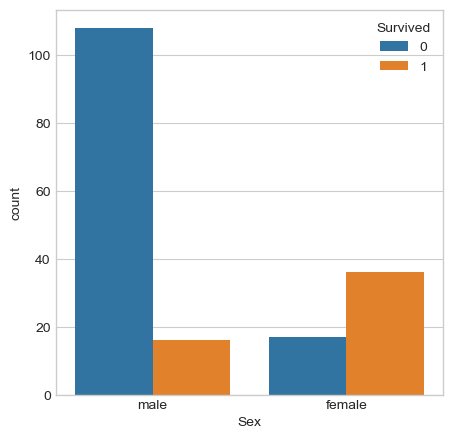

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x='Sex', data=train_age_isnull, hue='Survived');

In [34]:
mean_age_by_sex=train.groupby("Sex")['Age'].mean()

In [35]:
mean_men_age=mean_age_by_sex.male

In [36]:
train['Age'].fillna(value=mean_men_age, inplace=True)

In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
df_bin['Age'] = pd.cut(train['Age'], 8)
df_con['Age'] = train['Age']

In [39]:
df_bin['Age'].value_counts()

(30.263, 40.21]     332
(20.315, 30.263]    230
(10.368, 20.315]    115
(40.21, 50.158]      86
(0.34, 10.368]       64
(50.158, 60.105]     42
(60.105, 70.052]     17
(70.052, 80.0]        5
Name: Age, dtype: int64

## Feature SibSp
Description: The number of siblings the passenger has aboard the Titanic

In [40]:
# What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [41]:
'''
Function to plot counts and distribution of alabel variable and target variable side by side.
::param_data:: = target_dataframe
::param_bin_df:: = binned dataframe for countplot
::param_label_column:: = binary labellled column
::param_target_column:: = column you want to view counts and distributions
::param_figsize:: = size of figure (width, height)
::param_use_bin_df:: = whether or not to use the bin _df, default False
'''
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20,5), use_bin_df=False, color=True):
    if use_bin_df:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1,)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], kde_kws={'label': 'Survived'}, color='green')
        sns.distplot(data.loc[data[label_column] == 0][target_column], kde_kws={'label': 'Did not survive'}, color='red')
        plt.legend()
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], kde_kws={'label': 'Survived'}, color='green')
        sns.distplot(data.loc[data[label_column] == 0][target_column], kde_kws={'label': 'Did not survive'}, color='red')
        plt.legend()
    

In [42]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

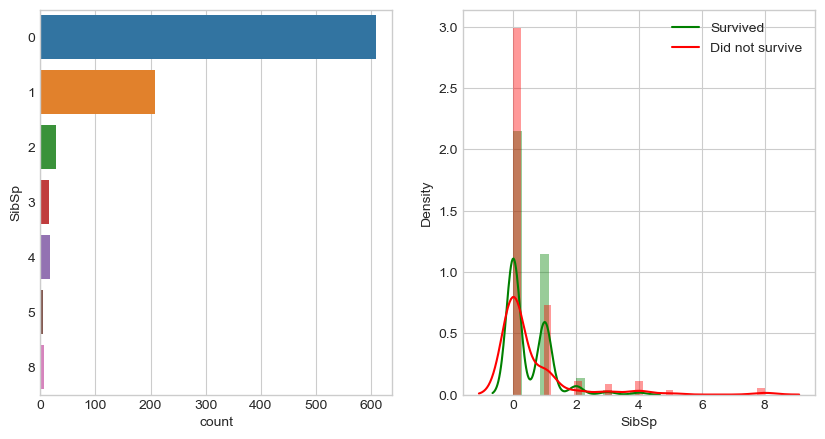

In [43]:
# visualise the count of SibSp aand the distribution of the values against Survived
plot_count_dist(train,
                bin_df=df_bin,
                label_column='Survived',
                target_column='SibSp',
                figsize=(10, 5))

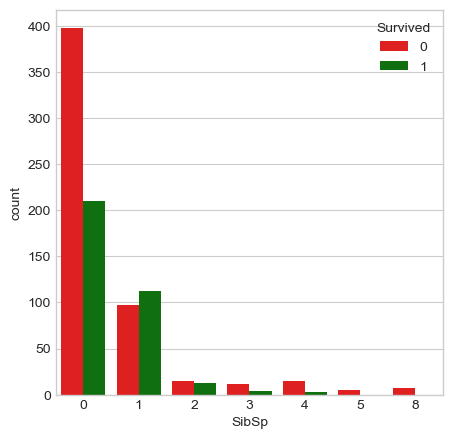

In [44]:
plt.figure(figsize=(5,5))
sns.countplot(x='SibSp', data=train, hue='Survived', palette={0: 'red', 1:'green'});

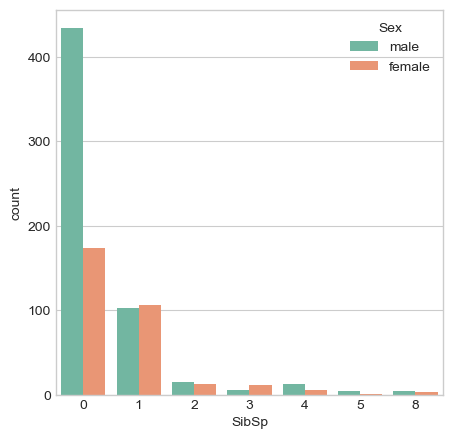

In [45]:
plt.figure(figsize=(5,5))
sns.countplot(x='SibSp', data=train, hue='Sex',palette = "Set2");

## Feature: Parch
Description: The number of parent/childeren the passenger has aboard the Titinic.

In [46]:
# What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [47]:
# Add SibSp to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

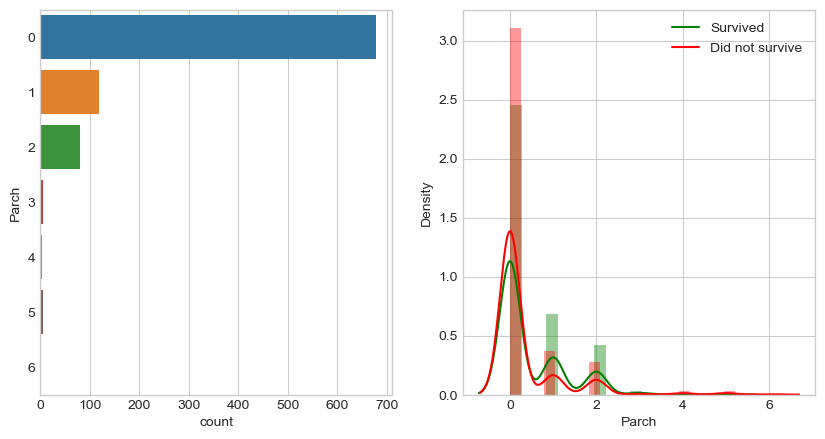

In [48]:
# visualise the count of SibSp aand the distribution of the values against Survived
plot_count_dist(train,
                bin_df=df_bin,
                label_column='Survived',
                target_column='Parch',
                figsize=(10, 5))

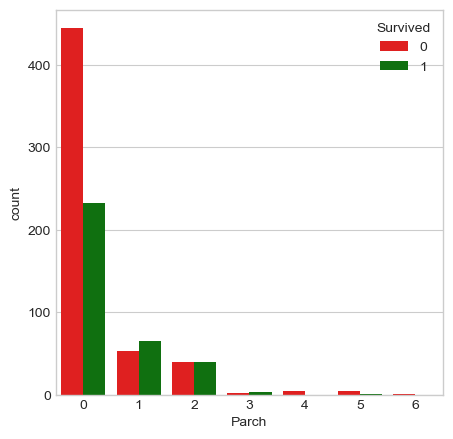

In [49]:
plt.figure(figsize=(5,5))
sns.countplot(x='Parch', data=train, hue='Survived', palette={0: 'red', 1:'green'});

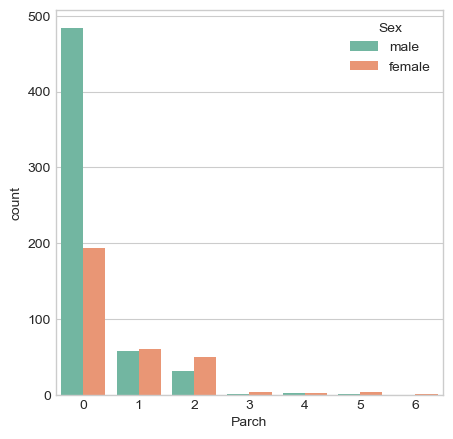

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(x='Parch', data=train, hue='Sex',palette = "Set2");

In [51]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


## Feature: Ticket
Description: The ticket number of the boarding passanger.

In [52]:
# How many kind of ticket are there?
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [53]:
missing_values("Ticket")

0


## Feature: Fare
Description: How much the ticket cost.

In [54]:
# How many missing values
missing_values("Fare")

0


In [55]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [56]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare']
df_bin['Fare'] = pd.cut(train['Fare'], bins=5)

In [57]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,"(20.315, 30.263]",1,0,"(-0.512, 102.466]"
1,1,1,1,"(30.263, 40.21]",1,0,"(-0.512, 102.466]"
2,1,3,1,"(20.315, 30.263]",0,0,"(-0.512, 102.466]"
3,1,1,1,"(30.263, 40.21]",1,0,"(-0.512, 102.466]"
4,0,3,0,"(30.263, 40.21]",0,0,"(-0.512, 102.466]"


In [58]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [59]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

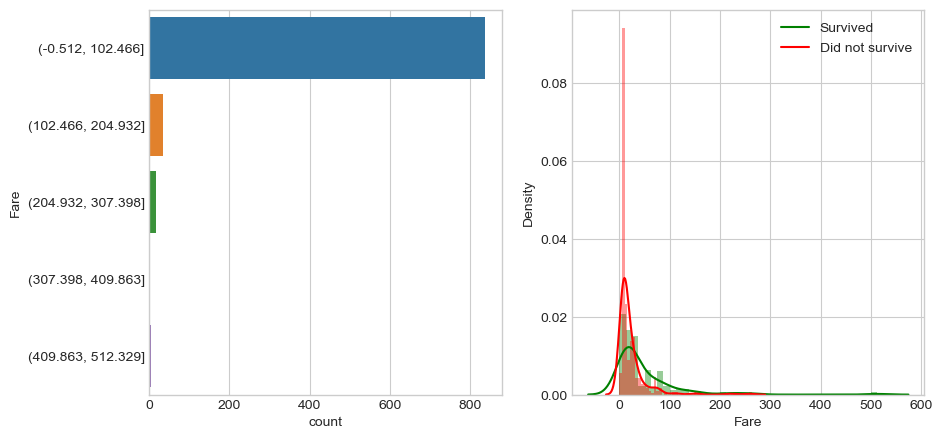

In [60]:
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived',
                target_column='Fare',
                figsize=(10,5),
                use_bin_df=True)

## Feature: Cabin
Description: The cabin number where the passanger was staying

In [61]:
# How many missing values?
missing_values('Cabin')

687


## Feature: Embarked
Description: The port where the passenger baoarded the Titinic.
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [62]:
# How many missing values?
missing_values('Embarked')

2


In [63]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Embarked'>

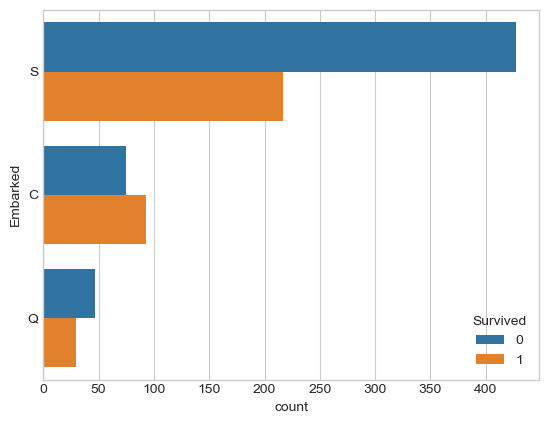

In [64]:
sns.countplot(y='Embarked', data=train, hue='Survived')

<AxesSubplot:xlabel='count', ylabel='Embarked'>

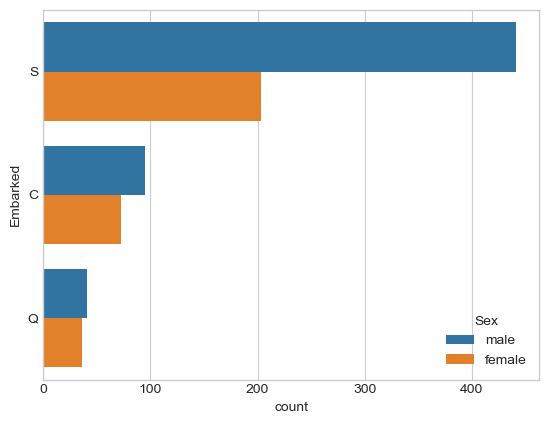

In [65]:
sns.countplot(y='Embarked', data=train, hue='Sex')

<AxesSubplot:xlabel='count', ylabel='Embarked'>

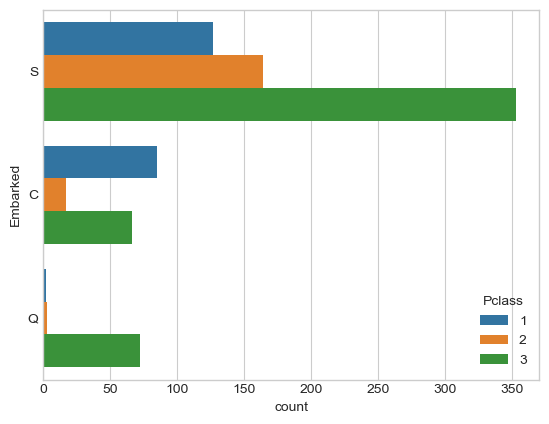

In [66]:
sns.countplot(y='Embarked', data=train, hue='Pclass')

In [67]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [68]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


In [69]:
# One hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [70]:
one_hot_cols.remove('Survived')

In [71]:
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)
df_bin_enc

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,"Age_(0.34, 10.368]","Age_(10.368, 20.315]","Age_(20.315, 30.263]","Age_(30.263, 40.21]",...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
887,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
888,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [72]:
# Label Encode all continous values using LabelEncoder()
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [73]:
df_con_enc = df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,52,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,48,1,0,189,2
4,0,2,1,48,0,0,43,2


## Machine Lerning Models

In [74]:
# Select the dataframe we want to use first for predictions
selected_df = df_con_enc

In [75]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) #data
y_train = selected_df.Survived #labels

In [76]:
# Shape of the data (without labels)
X_train.shape

(889, 7)

In [77]:
y_train.shape

(889,)

Function to fit the model and return the accuracy scores

In [78]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validaton
    train_pred= model_selection.cross_val_predict(algo,
                                                  X_train,
                                                  y_train,
                                                  cv=cv,
                                                  n_jobs=-1)
    # Cross validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) *100, 2)
    
    return train_pred, acc, acc_cv

### Logistic regression

In [79]:
# Logistic regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(),
                                                  X_train,
                                                  y_train,
                                                  10)
log_time = (time.time() - start_time)
print('Accuraccu: {0:.2f}'.format(acc_log))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_log))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=log_time)))

Accuraccu: 79.75
Accuracy CV 10-Fold: 79.30
Runnning Time: 0:00:10.619563


### K-Nearest Neighbours

In [80]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(),
                                                  X_train,
                                                  y_train,
                                                  10)
knn_time = (time.time() - start_time)
print('Accuracy: {0:.2f}'.format(acc_knn))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_knn))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=log_time)))

Accuracy: 78.52
Accuracy CV 10-Fold: 69.52
Runnning Time: 0:00:10.619563


### Gaussian Naive Bayes

In [81]:
# Gausian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(),
                                                  X_train,
                                                  y_train,
                                                  10)
knn_time = (time.time() - start_time)
print('Accuracy: {0:.2f}'.format(acc_gaussian))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_gaussian))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=log_time)))

Accuracy: 76.72
Accuracy CV 10-Fold: 76.27
Runnning Time: 0:00:10.619563


### Linear Support Vector Machnes (SVC)

In [82]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(LinearSVC(),
                                                  X_train,
                                                  y_train,
                                                  10)
knn_time = (time.time() - start_time)
print('Accuracy: {0:.2f}'.format(acc_svc))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_svc))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=log_time)))

Accuracy: 60.52
Accuracy CV 10-Fold: 72.67
Runnning Time: 0:00:10.619563


### Stochastic Gradient Descent

In [83]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(),
                                                  X_train,
                                                  y_train,
                                                  10)
knn_time = (time.time() - start_time)
print('Accuracy: {0:.2f}'.format(acc_sgd))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_sgd))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=log_time)))

Accuracy: 61.75
Accuracy CV 10-Fold: 62.99
Runnning Time: 0:00:10.619563


### Decision Tree Classifier

In [84]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),
                                                  X_train,
                                                  y_train,
                                                  10)
knn_time = (time.time() - start_time)
print('Accuracy: {0:.2f}'.format(acc_dt))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_dt))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=log_time)))

Accuracy: 98.20
Accuracy CV 10-Fold: 77.62
Runnning Time: 0:00:10.619563


### Gradient Boost Trees

In [85]:
# Gradient Boost Tress
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),
                                                  X_train,
                                                  y_train,
                                                  10)
knn_time = (time.time() - start_time)
print('Accuracy: {0:.2f}'.format(acc_gbt))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_gbt))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=log_time)))

Accuracy: 89.09
Accuracy CV 10-Fold: 83.01
Runnning Time: 0:00:10.619563


### CatBoost Algorithm

In [86]:
# View the data for the CatBoost model
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,28,1,0,18,2
1,0,0,52,1,0,207,0
2,2,0,34,0,0,41,2
3,0,0,48,1,0,189,2
4,2,1,48,0,0,43,2


In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    889 non-null    int64
 1   Sex       889 non-null    int32
 2   Age       889 non-null    int64
 3   SibSp     889 non-null    int64
 4   Parch     889 non-null    int64
 5   Fare      889 non-null    int64
 6   Embarked  889 non-null    int32
dtypes: int32(2), int64(5)
memory usage: 48.6 KB


In [87]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [88]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features # This means CatBoost has picked up that all variables except Fare can be treated as categorical

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [89]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train,
                  y_train,
                  cat_features)

In [90]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')
                                    
# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)
                                    
# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6873775	total: 252ms	remaining: 4m 11s
1:	learn: 0.6819329	total: 330ms	remaining: 2m 44s
2:	learn: 0.6768154	total: 388ms	remaining: 2m 8s
3:	learn: 0.6714559	total: 478ms	remaining: 1m 59s
4:	learn: 0.6663391	total: 551ms	remaining: 1m 49s
5:	learn: 0.6608615	total: 624ms	remaining: 1m 43s
6:	learn: 0.6557134	total: 693ms	remaining: 1m 38s
7:	learn: 0.6505673	total: 785ms	remaining: 1m 37s
8:	learn: 0.6460145	total: 855ms	remaining: 1m 34s
9:	learn: 0.6414120	total: 935ms	remaining: 1m 32s
10:	learn: 0.6370123	total: 1s	remaining: 1m 30s
11:	learn: 0.6323069	total: 1.07s	remaining: 1m 28s
12:	learn: 0.6273831	total: 1.14s	remaining: 1m 26s
13:	learn: 0.6246657	total: 1.18s	remaining: 1m 23s
14:	learn: 0.6203743	total: 1.26s	remaining: 1m 22s
15:	learn: 0.6163063	total: 1.33s	remaining: 1m 22s
16:	learn: 0.6125971	total: 1.44s	remaining: 1m 23s
17:	learn: 0.6085960	total: 1.52s	remaining: 1m 22s
18:	learn: 0.6048136	total: 1.59s	remaining: 1m 

In [91]:
# pip install ipywidgets==7.7

In [92]:
# Perform Catboost cross-validation
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-fold (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# how long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6753897	test: 0.6789718	best: 0.6789718 (0)	total: 71.5ms	remaining: 1m 11s
1:	learn: 0.6595393	test: 0.6653281	best: 0.6653281 (1)	total: 108ms	remaining: 53.9s
2:	learn: 0.6449137	test: 0.6527493	best: 0.6527493 (2)	total: 174ms	remaining: 58s
3:	learn: 0.6310431	test: 0.6399031	best: 0.6399031 (3)	total: 255ms	remaining: 1m 3s
4:	learn: 0.6181431	test: 0.6293028	best: 0.6293028 (4)	total: 336ms	remaining: 1m 6s
5:	learn: 0.6063100	test: 0.6205004	best: 0.6205004 (5)	total: 422ms	remaining: 1m 9s
6:	learn: 0.5952102	test: 0.6111386	best: 0.6111386 (6)	total: 466ms	remaining: 1m 6s
7:	learn: 0.5857999	test: 0.6031365	best: 0.6031365 (7)	total: 520ms	remaining: 1m 4s
8:	learn: 0.5753506	test: 0.5946981	best: 0.5946981 (8)	total: 591ms	remaining: 1m 5s
9:	learn: 0.5670520	test: 0.5878714	best: 0.5878714 (9)	total: 658ms	remaining: 1m 5s
10:	learn: 0.5582828	test: 0.5804104	best: 0.5804104 (10)	total: 710ms	remaining: 1m 3s
11:	learn: 0.5497600	test: 0

In [93]:
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

In [94]:
# Print out the CatBoost model metrics
print('---CatBoost---')
print('Accuracy: {}'.format(acc_catboost))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_catboost))
# print("Runing Time: {}".format(datetime.timedelta(seconds=catboost_time)))       

---CatBoost---
Accuracy: 89.43
Accuracy CV 10-Fold: 81.66


## Model Results
Wchich model had the best cross-validation accuracy?

In [95]:
models = pd.DataFrame({
    'Model' : ['KNN', 'Logistic Regression', 'Naive Bayes',
               'Stochastic Gradient DEcent', 'Linear SVC',
               'Decision Tree', 'Gradient Boosting Trees',
               'CatBoost'],
    'Scores': [
        acc_knn,
        acc_log,
        acc_gaussian,
        acc_sgd,
        acc_svc,
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Regular Accuracy Scores---")
models.sort_values(by='Scores',ascending=False)

---Regular Accuracy Scores---


,Model,Scores
5,Decision Tree,98.20
7,CatBoost,89.43
6,Gradient Boosting Trees,89.09
1,Logistic Regression,79.75
0,KNN,78.52
2,Naive Bayes,76.72
3,Stochastic Gradient DEcent,61.75
4,Linear SVC,60.52


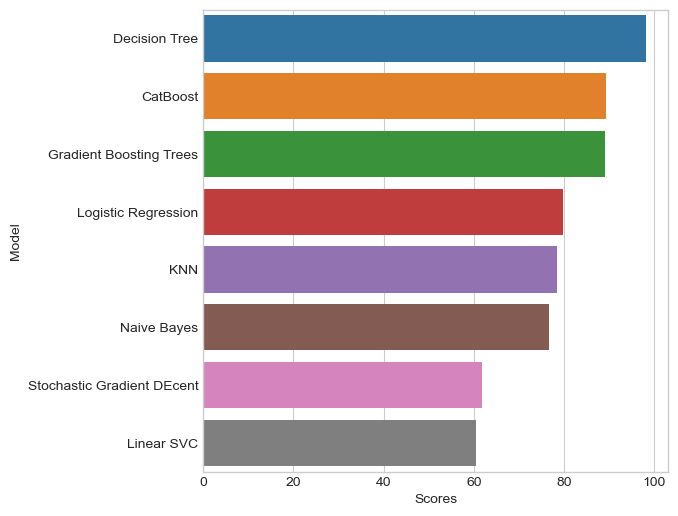

In [96]:
plt.figure(figsize=(6,6))
sns.barplot(x='Scores', y='Model', data=models.sort_values(by='Scores',ascending=False)[['Model', 'Scores']]);

In [97]:
cv_models = pd.DataFrame({
    'Model' : ['KNN', 'Logistic Regression', 'Naive Bayes',
               'Stochastic Gradient DEcent', 'Linear SVC',
               'Decision Tree', 'Gradient Boosting Trees',
               'CatBoost'],
    'Scores': [
        acc_cv_knn,
        acc_cv_log,
        acc_cv_gaussian,
        acc_cv_sgd,
        acc_cv_svc,
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print("---Cross-validation Accuracy Scores---")
cv_models.sort_values(by='Scores',ascending=False)

---Cross-validation Accuracy Scores---


,Model,Scores
6,Gradient Boosting Trees,83.01
7,CatBoost,81.66
1,Logistic Regression,79.30
5,Decision Tree,77.62
2,Naive Bayes,76.27
4,Linear SVC,72.67
0,KNN,69.52
3,Stochastic Gradient DEcent,62.99


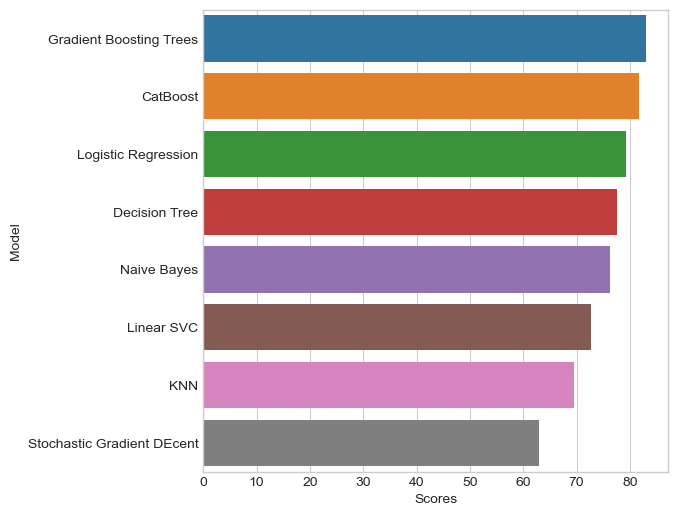

In [98]:
plt.figure(figsize=(6,6))
sns.barplot(x='Scores', y='Model', data=cv_models.sort_values(by='Scores',ascending=False)[['Model', 'Scores']]);

## Feature Importance
Which features of the best model were most important for making predictions?

In [99]:
# Feature importance
'''
Function to show which features are most important in the model.
::param_model:: Which model to use?
::param_data:: What data to use?
'''
def feature_importance(model, data):
    fea_imp=pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp =fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _= fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10,5))
    return fea_imp

,imp,col
3,9.278278,SibSp
6,9.935787,Embarked
4,12.284400,Parch
5,13.635463,Fare
2,14.660274,Age
0,18.600437,Pclass
1,21.605360,Sex


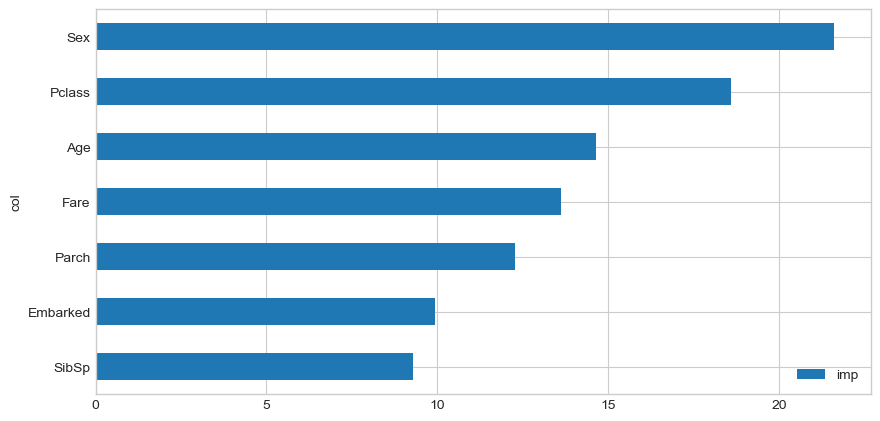

In [100]:
# plot the feature importance scores
feature_importance(catboost_model, X_train)

In [101]:
other_metrics = ['Precision', 'Recall', 'F1']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=other_metrics,
                                           plot=True)

for metric in other_metrics:
    print(str(metric)+': {}'.format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8952062999285215
Recall: 0.735614705882353
F1: 0.8068634290824425


## Submission

In [102]:
df_con_enc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,52,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,48,1,0,189,2
4,0,2,1,48,0,0,43,2


In [103]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [104]:
# Ceate a list of columns to be used for the predictions
wanted_test_columns =X_train.columns
wanted_test_columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [105]:
gbc_model = GradientBoostingClassifier().fit(X_train, y_train)
acc_gbc2 = round(gbc_model.score(X_train, y_train) * 100, 2)
    
# Cross Validaton
train_pred= model_selection.cross_val_predict(GradientBoostingClassifier(),
                                              X_train,
                                              y_train,
                                              cv=10,
                                              n_jobs=-1)
# Cross validation accuracy metric
acc_cv_gbc2 = round(metrics.accuracy_score(y_train, train_pred) *100, 2)
    
print('acc_gbc2: {}'.format(acc_gbc2))
print('acc_cv_gbc2: {}'.format(acc_cv_gbc2))

acc_gbc2: 89.09
acc_cv_gbc2: 83.01


In [106]:
# from sklearn.metrics import precision_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import recall_score

print('Preciosn: {}'.format(precision_score(y_train, train_pred)))
print('F1_score: {}'.format(f1_score(y_train, train_pred)))
print('Recall: {}'.format(recall_score(y_train, train_pred)))

Preciosn: 0.8203389830508474
F1_score: 0.7622047244094488
Recall: 0.711764705882353


In [107]:
# Make a prediction using the Gradien Boost classifier() model on the wanted columns
predictions = gbc_model.predict(test[wanted_test_columns].apply(LabelEncoder().fit_transform))

In [108]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [109]:
# Create a submision dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [110]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [111]:
# # Convert column to int
# submission['Survived'] = submission['Survived'].astype(int)

In [112]:
# Are our test and submision dataframe the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframe mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [113]:
# Convert submision dataframe to csv for submission to csv for Kaggle submission
submission.to_csv('./gbc_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [114]:
# check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv('./gbc_submission.csv')
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [115]:
# Make a prediction using the CatBoost classifier() model on the wanted columns
predictions_cb = catboost_model.predict(test[wanted_test_columns].apply(LabelEncoder().fit_transform))

In [116]:
submission_cb = pd.DataFrame()
submission_cb['PassengerId'] = test['PassengerId']
submission_cb['Survived'] = predictions_cb
submission_cb.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [117]:
if len(submission_cb) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframe mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [118]:
submission_cb.to_csv('./cb_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [119]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
acc_dt2 = round(dt_model.score(X_train, y_train) * 100, 2)
    
# Cross Validaton
train_pred= model_selection.cross_val_predict(DecisionTreeClassifier(),
                                              X_train,
                                              y_train,
                                              cv=10,
                                              n_jobs=-1)
# Cross validation accuracy metric
acc_cv_dt2 = round(metrics.accuracy_score(y_train, train_pred) *100, 2)
    
print('acc_gbc2: {}'.format(acc_dt2))
print('acc_cv_gbc2: {}'.format(acc_cv_dt2))
print('Precision: {}'.format(precision_score(y_train, train_pred)))
print('F1_score: {}'.format(f1_score(y_train, train_pred)))
print('Recall: {}'.format(recall_score(y_train, train_pred)))

acc_gbc2: 98.2
acc_cv_gbc2: 77.95
Precision: 0.7057142857142857
F1_score: 0.7159420289855073
Recall: 0.7264705882352941


In [120]:
# Make a prediction using the Decision Tree classifier() model on the wanted columns
predictions_dt = dt_model.predict(test[wanted_test_columns].apply(LabelEncoder().fit_transform))
submission_dt = pd.DataFrame()
submission_dt['PassengerId'] = test['PassengerId']
submission_dt['Survived'] = predictions_dt
submission_dt.head(10)
if len(submission_dt) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission_dt)))
else:
    print("Dataframe mismatched, won't be able to submit to Kaggle.")
submission_dt.to_csv('./dt_submission.csv', index=False)
print('Submission CSV is ready!')

Submission dataframe is the same length as test (418 rows).
Submission CSV is ready!
